In [1]:
%pylab
%matplotlib inline
''' Get samples '''
x = np.linspace(-100, 100, 1000)
def Image(sigma):
    return exp(-(x/sigma)**2/2) 
#     return np.abs(x) < 1.5*sigma

def sample(sigma, I=None):
    if I is None:
        img = Image(sigma)
    else:
        img = I + 0
    _x = np.linspace(-3*sigma, 3*sigma, 1000) * 5 + 500
    xf = np.floor(_x).astype(int)
    xc = xf + 1
    i_sample = img[xf] * (xc - _x) + img[xc] * (_x - xf)
    return i_sample


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Visualize different vessel responses

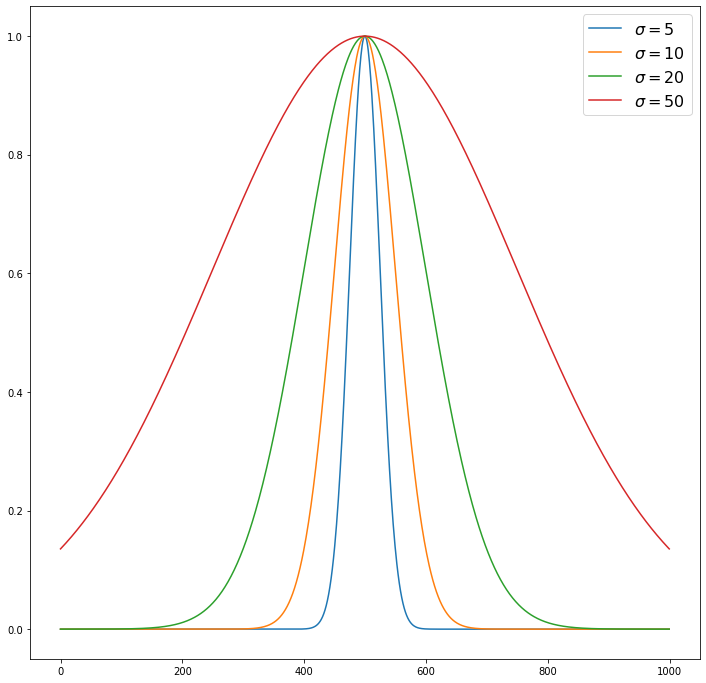

In [2]:
plt.figure(figsize=(12, 12))
Sigma = [5, 10, 20, 50]
for sig in Sigma:
    img = Image(sig)
    plt.plot(img)
plt.legend(["$\sigma = {}$".format(s) for s in Sigma], fontsize=16)

### Check the sampling function

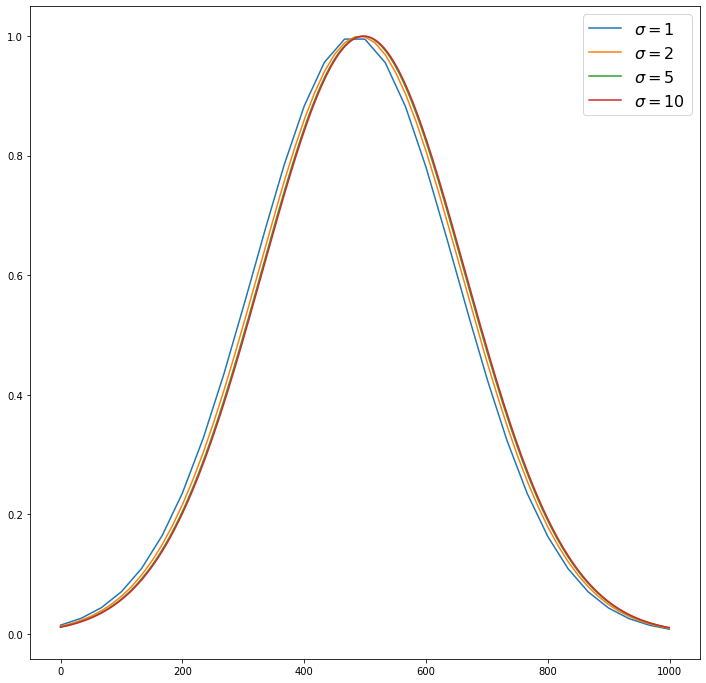

In [3]:
plt.figure(figsize=(12, 12))
Sigma = [1, 2, 5, 10]
for sig in Sigma:
    img = sample(sig)
    plt.plot(img)
plt.legend(["$\sigma = {}$".format(s) for s in Sigma], fontsize=16)

## Check the correlation for a specific sigma 

In [4]:
sig = 5
img = Image(sig)
corr = []
for i in np.linspace(0.1, 10, 1000):
    st = sample(i, img)
    st[:250] *= -1
    st[750:] *= -1
    st = st.mean()
    corr.append(st)
corr = np.array(corr)

5.045045045045045


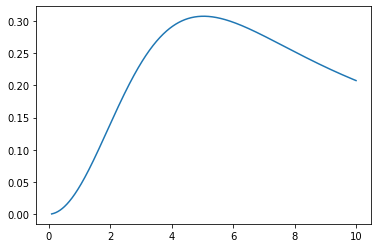

In [5]:
x_sig = np.linspace(0.1, 10, 1000)
plt.plot(x_sig, corr)
print(x_sig[np.argmax(corr)])

### Visualize loss 
Here, we will visualize the loss for a given vessel profile, and for a random intensity vessel.
Ideally we will have the following:
- For the vessel, the minima of the loss will be somewhere near the true vessel width
- For the random noise, the minima of loss will be near 0

In [6]:
loss = -corr + 0.025*x_sig

In [7]:
nimg = 0.05 * np.random.randn(*img.shape)
ncorr = []
for i in np.linspace(0.1, 10, 1000):
    st = sample(i, nimg)
    st[:250] *= -1
    st[750:] *= -1
    st = st.mean()
    ncorr.append(st)
ncorr = np.array(ncorr)

In [8]:
n_loss = -ncorr + 0.025*x_sig

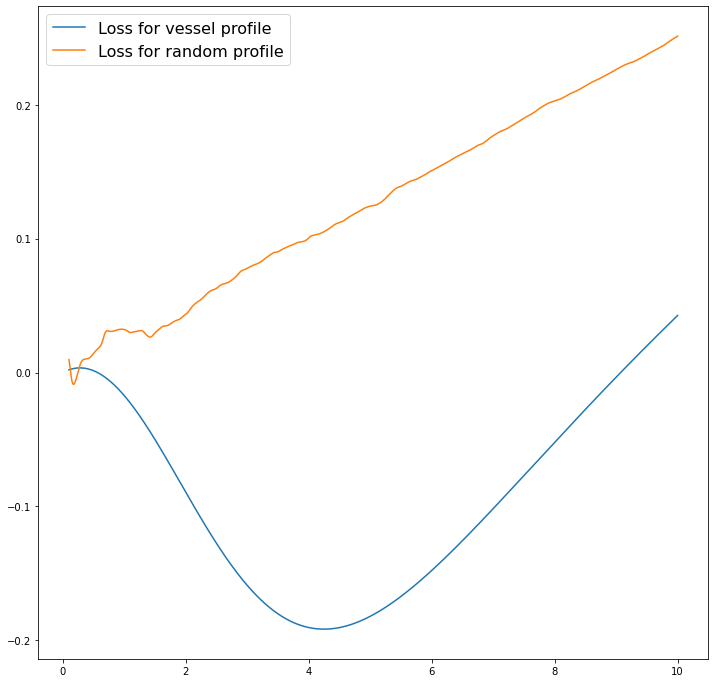

In [9]:
plt.figure(figsize=(12, 12))
plt.plot(x_sig, loss)
plt.plot(x_sig, n_loss)
plt.legend(['Loss for vessel profile', 'Loss for random profile'], fontsize=16)

### Get minima of loss profile

In [10]:
x_min_img = x_sig[np.argmin(loss)]
x_min_rand = x_sig[np.argmin(n_loss)]
print('Minima for image: {}'.format(x_min_img))
print('Minima for random: {}'.format(x_min_rand))

Minima for image: 4.252252252252252
Minima for random: 0.17927927927927928


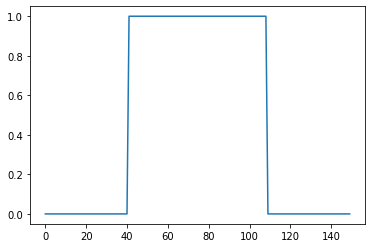

In [20]:
img = (img >  0.4).astype(int)
plt.plot(img[500-75:500+75])
corr = []
for i in range(0, 1000):
    s1 = -img + 0
    idx1 = max(0, i-250)
    idx2 = min(1000, i+250)
    s1[idx1:idx2] *= -1
    c = s1.mean()
    corr.append(c)
    

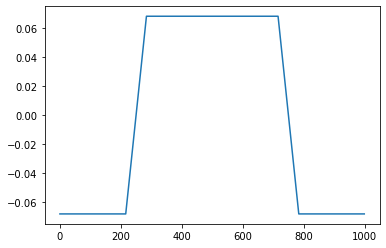

In [21]:
plt.plot(corr)